In [5]:
import moses

train = moses.get_dataset('train')
test = moses.get_dataset('test')
test_scaffolds = moses.get_dataset('test_scaffolds')

In [2]:
train

array(['CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1',
       'CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1',
       'Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO', ...,
       'NC(=O)c1ccc2ccccc2c1Br',
       'CC(=O)Nc1cccc(-c2nc3cc(C)ccc3[nH]c2=O)c1',
       'CC(NC(=O)OC(C)(C)C)c1nc(CO)nn1Cc1ccccc1'], dtype=object)

In [4]:
from pysmiles import read_smiles
import networkx as nx

smiles = 'C1CC[13CH2]CC1C1CCCCC1'
mol = read_smiles(smiles)

# atom vector (C only)
print(mol.nodes(data='element'))
# adjacency matrix
print(nx.to_numpy_matrix(mol, weight='order'))
print(nx.adjacency_matrix(mol, weight='order').todense())

[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'C'), (10, 'C'), (11, 'C')]
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]
[[0 1 0 0 0 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 0 0 0 1 0]]


In [2]:
from rdkit import Chem

In [6]:
m = Chem.MolFromSmiles('c1ccncc1')

In [11]:
len(m.ToBinary())

123

In [12]:
n = Chem.MolFromSmiles('C1CCCC2C1CCCC2')
len(n.ToBinary())

166

In [3]:
# GENTRL

import torch
import re


_atoms = ['He', 'Li', 'Be', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'Cl', 'Ar',
          'Ca', 'Ti', 'Cr', 'Fe', 'Ni', 'Cu', 'Ga', 'Ge', 'As', 'Se',
          'Br', 'Kr', 'Rb', 'Sr', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh',
          'Pd', 'Ag', 'Cd', 'Sb', 'Te', 'Xe', 'Ba', 'La', 'Ce', 'Pr',
          'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Er', 'Tm', 'Yb',
          'Lu', 'Hf', 'Ta', 'Re', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb',
          'Bi', 'At', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'Pu', 'Am', 'Cm',
          'Bk', 'Cf', 'Es', 'Fm', 'Md', 'Lr', 'Rf', 'Db', 'Sg', 'Mt',
          'Ds', 'Rg', 'Fl', 'Mc', 'Lv', 'Ts', 'Og']


def get_tokenizer_re(atoms):
    return re.compile('('+'|'.join(atoms)+r'|\%\d\d|.)')


_atoms_re = get_tokenizer_re(_atoms)


__i2t = {
    0: 'unused', 1: '>', 2: '<', 3: '2', 4: 'F', 5: 'Cl', 6: 'N',
    7: '[', 8: '6', 9: 'O', 10: 'c', 11: ']', 12: '#',
    13: '=', 14: '3', 15: ')', 16: '4', 17: '-', 18: 'n',
    19: 'o', 20: '5', 21: 'H', 22: '(', 23: 'C',
    24: '1', 25: 'S', 26: 's', 27: 'Br'
}


__t2i = {
    '>': 1, '<': 2, '2': 3, 'F': 4, 'Cl': 5, 'N': 6, '[': 7, '6': 8,
    'O': 9, 'c': 10, ']': 11, '#': 12, '=': 13, '3': 14, ')': 15,
    '4': 16, '-': 17, 'n': 18, 'o': 19, '5': 20, 'H': 21, '(': 22,
    'C': 23, '1': 24, 'S': 25, 's': 26, 'Br': 27
}


def smiles_tokenizer(line, atoms=None):
    """
    Tokenizes SMILES string atom-wise using regular expressions. While this
    method is fast, it may lead to some mistakes: Sn may be considered as Tin
    or as Sulfur with Nitrogen in aromatic cycle. Because of this, you should
    specify a set of two-letter atoms explicitly.
    Parameters:
         atoms: set of two-letter atoms for tokenization
    """
    if atoms is not None:
        reg = get_tokenizer_re(atoms)
    else:
        reg = _atoms_re
    return reg.split(line)[1::2]


def encode(sm_list, pad_size=50):
    """
    Encoder list of smiles to tensor of tokens
    """
    res = []
    lens = []
    for s in sm_list:
        tokens = ([1] + [__t2i[tok]
                  for tok in smiles_tokenizer(s)])[:pad_size - 1]
        lens.append(len(tokens))
        tokens += (pad_size - len(tokens)) * [2]
        res.append(tokens)

    return torch.tensor(res).long(), lens


def decode(tokens_tensor):
    """
    Decodes from tensor of tokens to list of smiles
    """

    smiles_res = []

    for i in range(tokens_tensor.shape[0]):
        cur_sm = ''
        for t in tokens_tensor[i].detach().cpu().numpy():
            if t == 2:
                break
            elif t > 2:
                cur_sm += __i2t[t]

        smiles_res.append(cur_sm)

    return smiles_res


def get_vocab_size():
    return len(__i2t)

In [7]:
a = encode(["C1CCCC2C1CCCC2", "c1ccncc1", "CC(=O)NCCC1=CNc2c1cc(OC)cc2CC(=O)NCCc1c[nH]c2ccc(OC)cc12"])

In [11]:
len(a[0][0])

50

In [37]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
res = molecule.search('viagra')

In [33]:
res

[{'atc_classifications': ['G04BE03'], 'availability_type': 1, 'biotherapeutic': None, 'black_box_warning': 1, 'chebi_par_id': 9139, 'chirality': 2, 'cross_references': [{'xref_id': 'sildenafil%20citrate', 'xref_name': 'sildenafil citrate', 'xref_src': 'DailyMed'}, {'xref_id': '26748898', 'xref_name': 'SID: 26748898', 'xref_src': 'PubChem'}, {'xref_id': '50085897', 'xref_name': 'SID: 50085897', 'xref_src': 'PubChem'}], 'dosed_ingredient': True, 'first_approval': 1998, 'first_in_class': 0, 'helm_notation': None, 'indication_class': 'Impotence Therapy', 'inorganic_flag': 0, 'max_phase': 4, 'molecule_chembl_id': 'CHEMBL192', 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL192', 'parent_chembl_id': 'CHEMBL192'}, 'molecule_properties': {'alogp': '1.61', 'aromatic_rings': 3, 'cx_logd': '1.16', 'cx_logp': '1.23', 'cx_most_apka': '7.63', 'cx_most_bpka': '5.98', 'full_molformula': 'C22H30N6O4S', 'full_mwt': '474.59', 'hba': 8, 'hba_lipinski': 10, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 3

In [41]:
from chembl_webresource_client.new_client import new_client
target = new_client.target
gene_name = 'CCR4'
res = target.search(gene_name)

In [12]:
from chembl_webresource_client.new_client import new_client
activities = new_client.activity
activities.filter(target_chembl_id="CHEMBL2414").filter(standard_type="IC50")

[{'activity_comment': None, 'activity_id': 72026, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL656318', 'assay_description': 'Inhibition of [125I]MDC binding to recombinant human C-C chemokine receptor type 4 (CCR4) expressed in murine pre-B cells', 'assay_type': 'B', 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000219', 'bao_label': 'cell-based format', 'canonical_smiles': 'O=C(C[C@H]1S[C@H](c2ccc(Cl)cc2Cl)N(CCC(=O)N2CCNCC2)C1=O)NCc1cccc2ccccc12', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1148225', 'document_journal': 'Bioorg. Med. Chem. Lett.', 'document_year': 2004, 'ligand_efficiency': {'bei': '9.32', 'le': '0.19', 'lle': '0.84', 'sei': '6.67'}, 'molecule_chembl_id': 'CHEMBL297145', 'molecule_pref_name': None, 'parent_molecule_chembl_id': 'CHEMBL297145', 'pchembl_value': '5.46', 'potential_duplicate': False, 'qudt_units': 'http://www.openphacts.org/units/Nanomolar', 'record_id': 68872, 'relation': '=', 'src_id': 1, 

In [35]:
activities[2]['target_chembl_id']

'CHEMBL3879801'

In [22]:
activities[0]['target_chembl_id']

'CHEMBL1806'

In [1]:
from chembl_webresource_client.new_client import new_client
# target = new_client.target
# activity = new_client.activity
# herg = target.search('herg')[0]
# herg_activities = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="Ki")

In [12]:
target = new_client.target
activity = new_client.activity

target = new_client.target
activity = new_client.activity
ccr5 = target.search('C-C chemokine receptor type 5')[0]

In [13]:
ccr5['target_chembl_id']

'CHEMBL274'

In [20]:
ccr5_activities = activity.filter(target_chembl_id="CHEMBL274").filter(standard_type="IC50")

In [21]:
len(ccr5_activities)

3813

In [69]:
herg['target_chembl_id']

'CHEMBL240'

In [70]:
herg_activities[1000]['target_chembl_id']

'CHEMBL240'

In [29]:
len(herg_activities)

2620

In [53]:
from pathlib import Path
import csv

DATA_DIR = Path("../data")

activities = new_client.activity
activities.filter(
    target_chembl_id="CHEMBL2414", pchembl_value__isnull=False, standard_type="IC50"
)

columns = activities[0].keys()
csv_file = DATA_DIR / "ccr4_ic50_meta.csv"
try:
    with open(csv_file, "w") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=columns)
        writer.writeheader()
        for data in activities:
            writer.writerow(data)
except IOError:
    print("I/O error")


I/O error


In [22]:
moses

NameError: name 'moses' is not defined

In [36]:
a = moses.utils.get_mol("c1cc(CN2CCCNCCNCCCNCC2)ccc1CN1CCCNCCNCCCNCC1")

In [37]:
print(a)

In [6]:
import pandas as pd

def filter_valid(gen_path, save_path=None):
    gen = pd.read_csv(gen_path)

    valid = [moses.utils.get_mol(molec) != None for molec in gen["SMILES"]]
    gen_valid = gen[valid].reset_index(drop=True)

    return gen_valid

In [64]:
a = filter_valid("/Users/Munchic/Developer/Capstone/moses/tinymolecule-out/samples/sample_2000.csv", save_path=None)

MILES Parse Error: extra open parentheses for input: 'CNC(=O)c1ccc(-c2ccc(CNC2c3ccc(Cl)cc3)ccc1S2C(=O)N2'
RDKit ERROR: [11:50:01] SMILES Parse Error: unclosed ring for input: 'CNc1nc(Nc2c(O)ccc3ns(N)F)nc2C'
RDKit ERROR: [11:50:01] SMILES Parse Error: syntax error while parsing: CCCCCCCCCCCCCCCC[C@HH(Cc1cc(N)cc1OCCN1C(=O)Nc1ccc(-c2ccc(Oc3C-c3ccc(c2)c3-c3cccc(n(C)cc2)CC1
RDKit ERROR: [11:50:01] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCCCCCCCCCC[C@HH(Cc1cc(N)cc1OCCN1C(=O)Nc1ccc(-c2ccc(Oc3C-c3ccc(c2)c3-c3cccc(n(C)cc2)CC1' for input: 'CCCCCCCCCCCCCCCC[C@HH(Cc1cc(N)cc1OCCN1C(=O)Nc1ccc(-c2ccc(Oc3C-c3ccc(c2)c3-c3cccc(n(C)cc2)CC1'
RDKit ERROR: [11:50:01] SMILES Parse Error: extra close parentheses while parsing: Cc1cccnc1/N=C1\c2ncncc3c2C(O)(=O)=O)c1c[nH]1
RDKit ERROR: [11:50:01] SMILES Parse Error: Failed parsing SMILES 'Cc1cccnc1/N=C1\c2ncncc3c2C(O)(=O)=O)c1c[nH]1' for input: 'Cc1cccnc1/N=C1\c2ncncc3c2C(O)(=O)=O)c1c[nH]1'
RDKit ERROR: [11:50:01] SMILES Parse Error: syntax error while

In [65]:
a.head()

,SMILES
0,CCCCCCCCCCCC(=O)N[C@@H](Cc1ccccc1)NC(=O)[C@H](...
1,CC/C=C/CC(CC)CO.Cl
2,OC(=O)c1ccc(C(=C2C(=O)O)c2c1)C1CCCCC1
3,N#CCCN1CCOCC1
4,CC(=O)[C@@H]1NC(=O)[C@H](CC(N)C)[C@@H]1O.Cl


In [138]:
pd.isna("hi")

False

In [142]:
import numpy as np

np.nan

nan

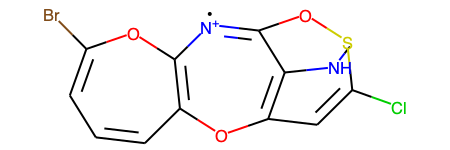

In [56]:
moses.utils.get_mol(a["SMILES"][9])

In [128]:
def hash_smiles(smiles, hash_crop=8):
    namespace = uuid.NAMESPACE_URL
    hash_val = uuid.uuid5(uuid.NAMESPACE_URL, name=smiles)
    cropped_hash_val = str(hash_val)[:hash_crop]

    return cropped_hash_val

a["SMILES"].apply(hash_smiles)

0     1116378f
1     0e7d5523
2     2252b48c
3     a467a99e
4     48add6eb
5     670c30ec
6     c4c35725
7     ce15163a
8     0c9a4888
9     56707c6c
10    6e2a76f1
11    763304a3
12    e233a982
13    cbe30797
14    c60d3038
15    7ca19e43
16    9ffe9c99
17    3fb24752
18    46636dd3
19    cb97c340
20    32b93508
21    216865a5
22    e01002dd
23    378bde04
24    ad90bea8
25    179e4140
26    ad66899c
27    f0ef6648
28    6c17732e
29    9a6c8f98
30    036ae82f
31    44dc0b03
32    6c3c9d72
33    d6e6c867
Name: SMILES, dtype: object

In [119]:
import base64
import uuid

base64.urlsafe_b64encode(bytes(a["SMILES"][11], "utf-8"))[:8].decode()

str(uuid.uuid5(uuid.NAMESPACE_URL, name=a["SMILES"][9]))

'56707c6c-00a4-5f24-ae1f-d9ad2c2e90cf'

In [54]:
a

KeyError: "None of [Int64Index([1], dtype='int64')] are in the [columns]"

In [15]:
import uuid

uuid.uuid5("hi")

TypeError: uuid5() missing 1 required positional argument: 'name'

In [92]:
import pybel

input = "C1=CC=CS1"
mymol = pybel.readstring("smi", input)

AttributeError: module 'pybel' has no attribute 'readstring'

In [93]:
pybel.__package__

'pybel'

In [94]:
import pybel
url = 'https://raw.githubusercontent.com/pharmacome/knowledge/master/hbp_knowledge/proteostasis/kim2013.bel'
graph = pybel.from_url(url)

AttributeError: module 'pybel' has no attribute 'from_url'

In [150]:
import openbabel

conv = openbabel.OBConversion()
conv.SetOneObjectOnly(True)
conv.OpenInAndOutFiles("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb/test.smi", "/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb/test.pdbqt")
conv.SetInAndOutFormats("smi", "pdbqt")
conv.AddOption("gen3d", conv.GENOPTIONS)
conv.AddOption("h", conv.GENOPTIONS)
conv.Convert()

conv.OpenInAndOutFiles("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb/test.smi", "/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb/test-2.pdbqt")
conv.Convert()

2

In [149]:
dir(conv)

['ALL',
 'AddChemObject',
 'AddOption',
 'CloseOutFile',
 'Convert',
 'CopyOptions',
 'Description',
 'FindFormat',
 'FormatFromExt',
 'FormatFromMIME',
 'FullConvert',
 'GENOPTIONS',
 'GetAuxConv',
 'GetChemObject',
 'GetCount',
 'GetDefaultFormat',
 'GetInFilename',
 'GetInFormat',
 'GetInGzipped',
 'GetInLen',
 'GetInPos',
 'GetInStream',
 'GetOptionParams',
 'GetOptions',
 'GetOutFilename',
 'GetOutFormat',
 'GetOutGzipped',
 'GetOutStream',
 'GetOutputIndex',
 'GetSupportedInputFormat',
 'GetSupportedOutputFormat',
 'GetTitle',
 'INOPTIONS',
 'IsFirstInput',
 'IsLast',
 'IsLastFile',
 'IsOption',
 'NumInputObjects',
 'OUTOPTIONS',
 'OpenInAndOutFiles',
 'Read',
 'ReadFile',
 'ReadString',
 'RegisterFormat',
 'RegisterOptionParam',
 'RemoveOption',
 'ReportNumberConverted',
 'SetAuxConv',
 'SetFirstInput',
 'SetInAndOutFormats',
 'SetInFormat',
 'SetInStream',
 'SetLast',
 'SetMoreFilesToCome',
 'SetOneObjectOnly',
 'SetOptions',
 'SetOutFormat',
 'SetOutStream',
 'SetOutputIndex',

In [148]:
import openbabel

conv = openbabel.OBConversion()
mol = openbabel.OBMol()
conv.SetInAndOutFormats("smi", "pdb")
conv.ReadString(mol, "CNc1c(Oc2cccc(Br)oc2[n+]2)cc(Cl)soc21")

conv.AddOption("gen3d", conv.GENOPTIONS)
conv.AddOption("h", conv.GENOPTIONS)
conv.Convert()

conv.WriteFile(mol, "/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb/test.pdb")

True

In [ ]:
conv.OpenInAndOutFiles

In [111]:
mol

<openbabel.openbabel.OBMol; proxy of <Swig Object of type 'OpenBabel::OBMol *' at 0x7fbe1a1f66c0> >

In [131]:
conv.GENOPTIONS

2

In [113]:
obConversion.WriteFile(mol, "/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb/test.pdb")

True

In [112]:
obConversion.Convert()

0

In [192]:
with open("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/valid_sample_1e5/logs/778c67fc.txt") as log:
    lines = log.readlines()

In [193]:
all_positions = lines[-11:-1]
for i in range(len(all_positions)):
    all_positions[i] = list(map(float, all_positions[i].split()))

In [194]:
import numpy as np

a = np.array(all_positions)

In [86]:
colnames = list(map(lambda x: [f"affin_kcal_mol-1_{x}", f"best_dist_rmsd_lb_{x}", f"best_dist_rmsd_ub_{x}"], range(1, 11)))

In [173]:
import itertools

a = sorted(list(itertools.chain.from_iterable(colnames)), key=lambda x: int(x[-x[::-1].find("_"):]))
a = np.array(sorted(a, key=lambda x: x[:-x[::-1].find("_")]))

In [191]:
a.shape

(30,)

In [175]:
with open("/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb/test_log.txt") as log:
    lines = log.readlines()

if len(lines) > 27:  # where
    all_positions = lines[-lines[::-1].index('\n')+3:-1]
for i in range(len(all_positions)):
    all_positions[i] = list(map(float, all_positions[i].split()))

def create_empty_entry():
    filler = np.ones((10, 3)) * np.nan

    return filler

In [190]:
lines[-lines[::-1].index('\n')+3:-1]

['   1         -9.1      0.000      0.000\n',
 '   2         -9.0      4.255      9.536\n',
 '   3         -8.9      4.263      6.959\n',
 '   4         -8.9      4.354      6.927\n',
 '   5         -8.6      4.307     10.204\n',
 '   6         -8.6      5.080     10.036\n',
 '   7         -8.4      4.932      8.650\n',
 '   8         -8.3      1.923      2.310\n',
 '   9         -8.3      2.307      8.139\n',
 '  10         -8.2      3.176      5.846\n']

['Writing output ... done.\n',
 '  10         -8.2      3.176      5.846\n',
 '   9         -8.3      2.307      8.139\n',
 '   8         -8.3      1.923      2.310\n',
 '   7         -8.4      4.932      8.650\n',
 '   6         -8.6      5.080     10.036\n',
 '   5         -8.6      4.307     10.204\n',
 '   4         -8.9      4.354      6.927\n',
 '   3         -8.9      4.263      6.959\n',
 '   2         -9.0      4.255      9.536\n',
 '   1         -9.1      0.000      0.000\n',
 '-----+------------+----------+----------\n',
 '     | (kcal/mol) | rmsd l.b.| rmsd u.b.\n',
 'mode |   affinity | dist from best mode\n',
 '\n',
 'Refining results ... done.\n',
 'Performing search ... done.\n',
 'Using random seed: 1224363035\n',
 'Analyzing the binding site ... done.\n',
 'Setting up the scoring function ... done.\n',
 'Reading input ... done.\n',
 'WARNING: at low exhaustiveness, it may be impossible to utilize all CPUs\n',
 'Detected 12 CPUs\n',
 'Output will be /Users/Munchic/Deve

In [183]:
lines

['#################################################################\n',
 '# If you used AutoDock Vina in your work, please cite:          #\n',
 '#                                                               #\n',
 '# O. Trott, A. J. Olson,                                        #\n',
 '# AutoDock Vina: improving the speed and accuracy of docking    #\n',
 '# with a new scoring function, efficient optimization and       #\n',
 '# multithreading, Journal of Computational Chemistry 31 (2010)  #\n',
 '# 455-461                                                       #\n',
 '#                                                               #\n',
 '# DOI 10.1002/jcc.21334                                         #\n',
 '#                                                               #\n',
 '# Please see http://vina.scripps.edu for more information.      #\n',
 '#################################################################\n',
 '\n',
 'WARNING: The search space volume > 27000 Angstrom^3 (Se

39

In [176]:
log = np.array(all_positions)[:5, 1:]
if log.shape == ():
    log = create_empty_entry()
elif log.shape[0] < 10:
    filler = np.ones((10 - log.shape[0], 3)) * np.nan
    log = np.vstack((log, filler))
entry = log.flatten(order='F')

In [177]:
entry

array([-9.1  , -9.   , -8.9  , -8.9  , -8.6  ,    nan,    nan,    nan,
          nan,    nan,  0.   ,  4.255,  4.263,  4.354,  4.307,    nan,
          nan,    nan,    nan,    nan,  0.   ,  9.536,  6.959,  6.927,
       10.204,    nan,    nan,    nan,    nan,    nan])

In [172]:
log

array([[-9.1  ,  0.   ,  0.   ],
       [-9.   ,  4.255,  9.536],
       [-8.9  ,  4.263,  6.959],
       [-8.9  ,  4.354,  6.927],
       [-8.6  ,  4.307, 10.204],
       [   nan,    nan,    nan],
       [   nan,    nan,    nan],
       [   nan,    nan,    nan],
       [   nan,    nan,    nan],
       [   nan,    nan,    nan]])

In [155]:
entry

array([-9.1  ,  0.   ,  0.   , -9.   ,  4.255,  9.536, -8.9  ,  4.263,
        6.959, -8.9  ,  4.354,  6.927, -8.6  ,  4.307, 10.204, -8.6  ,
        5.08 , 10.036, -8.4  ,  4.932,  8.65 , -8.3  ,  1.923,  2.31 ,
       -8.3  ,  2.307,  8.139, -8.2  ,  3.176,  5.846])

In [137]:
np.ones((5, 5)) * np.nan

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [140]:
np.array(None).shape == 

True

In [4]:

def change_file_ext(filename, ext=None):
    ext_pos = filename.find(".")
    new_filename = filename[:ext_pos]
    if ext:
        new_filename += f".{ext}"

    return new_filename

In [6]:
change_file_ext("12345678.pdbqt", ext="txt")

'12345678.txt'

In [217]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

def get_vina_header():
    colnames = list(
        map(
            lambda x: [
                f"affin_kcal_mol-1_{x}",
                f"best_dist_rmsd_lb_{x}",
                f"best_dist_rmsd_ub_{x}",
            ],
            range(1, 11),
        )
    )

    num_sorted = sorted(
        list(itertools.chain.from_iterable(colnames)),
        key=lambda x: int(x[-x[::-1].find("_") :]),
    )
    cols_sorted = np.array(sorted(num_sorted, key=lambda x: x[: -x[::-1].find("_")]))

    return cols_sorted


def generate_logs_table(logs_path):
    all_logs = os.listdir(logs_path)
    logs_table = get_vina_header()  # get header of log entries

    for logfile in all_logs:
        with open(logs_path / logfile) as _log:
            lines = _log.readlines()

        if len(lines) > 27:  # where the table starts
            all_positions = lines[
                -lines[::-1].index("\n") + 3 : -1
            ]  # binding positions log
        else:
            continue

        for i in range(len(all_positions)):
            all_positions[i] = list(map(float, all_positions[i].split()))

        log = np.array(all_positions)[:, 1:]
        if log.shape == ():
            log = create_empty_entry()
        elif log.shape[0] < 10:
            filler = np.ones((10 - log.shape[0], 3)) * np.nan
            log = np.vstack((log, filler))
        entry = log.flatten(order="F")

        logs_table = np.vstack((logs_table, entry))    
        logs_df = pd.DataFrame(logs_table[1:], columns=logs_table[0], dtype=float)

    return logs_df

In [218]:
logs_df = generate_logs_table(
    Path(
        "/Users/Munchic/Developer/Capstone/tinymolecule/data/pdb_out/valid_sample_1e5/logs"
    )
)

In [219]:
logs_df.head()

,affin_kcal_mol-1_1,affin_kcal_mol-1_2,affin_kcal_mol-1_3,affin_kcal_mol-1_4,affin_kcal_mol-1_5,affin_kcal_mol-1_6,affin_kcal_mol-1_7,affin_kcal_mol-1_8,affin_kcal_mol-1_9,affin_kcal_mol-1_10,...,best_dist_rmsd_ub_1,best_dist_rmsd_ub_2,best_dist_rmsd_ub_3,best_dist_rmsd_ub_4,best_dist_rmsd_ub_5,best_dist_rmsd_ub_6,best_dist_rmsd_ub_7,best_dist_rmsd_ub_8,best_dist_rmsd_ub_9,best_dist_rmsd_ub_10
0,-8.9,-8.3,-8.3,-8.3,-8.2,-8.1,-8.0,-8.0,-7.8,-7.8,...,0.0,8.968,7.124,6.804,8.272,5.938,8.674,7.001,8.568,4.386
1,-9.7,-9.4,-9.2,-9.1,-8.5,-8.4,-8.1,-8.0,-8.0,-8.0,...,0.0,7.237,3.220,2.763,8.205,8.733,10.832,3.882,8.752,9.361
2,-10.9,-10.8,-10.5,-10.2,-10.1,-10.0,-9.9,-9.6,-9.3,-9.3,...,0.0,9.063,7.328,2.840,10.573,6.107,10.287,10.492,10.706,11.499
3,-8.6,-8.6,-8.5,-8.5,-8.5,-8.3,-8.3,-8.1,-8.1,-7.7,...,0.0,6.951,7.032,8.381,6.441,7.650,8.090,8.987,6.265,3.308
4,-5.3,-5.2,-5.1,-5.0,-5.0,-4.8,-4.7,-4.5,-4.5,-4.4,...,0.0,4.685,3.078,1.129,7.535,6.317,2.691,6.653,5.660,5.612


In [237]:
import seaborn as sns

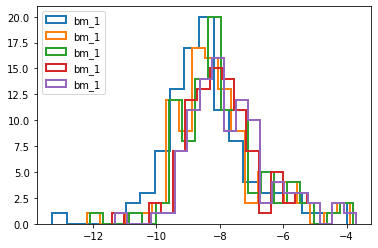

In [235]:
plt.hist(logs_df["affin_kcal_mol-1_1"], bins=20, histtype="step", label="bm_1", linewidth=2)
plt.hist(logs_df["affin_kcal_mol-1_2"], bins=20, histtype="step", label="bm_1", linewidth=2)
plt.hist(logs_df["affin_kcal_mol-1_3"], bins=20, histtype="step", label="bm_1", linewidth=2)
plt.hist(logs_df["affin_kcal_mol-1_4"], bins=20, histtype="step", label="bm_1", linewidth=2)
plt.hist(logs_df["affin_kcal_mol-1_5"], bins=20, histtype="step", label="bm_1", linewidth=2)

plt.legend()
plt.show()

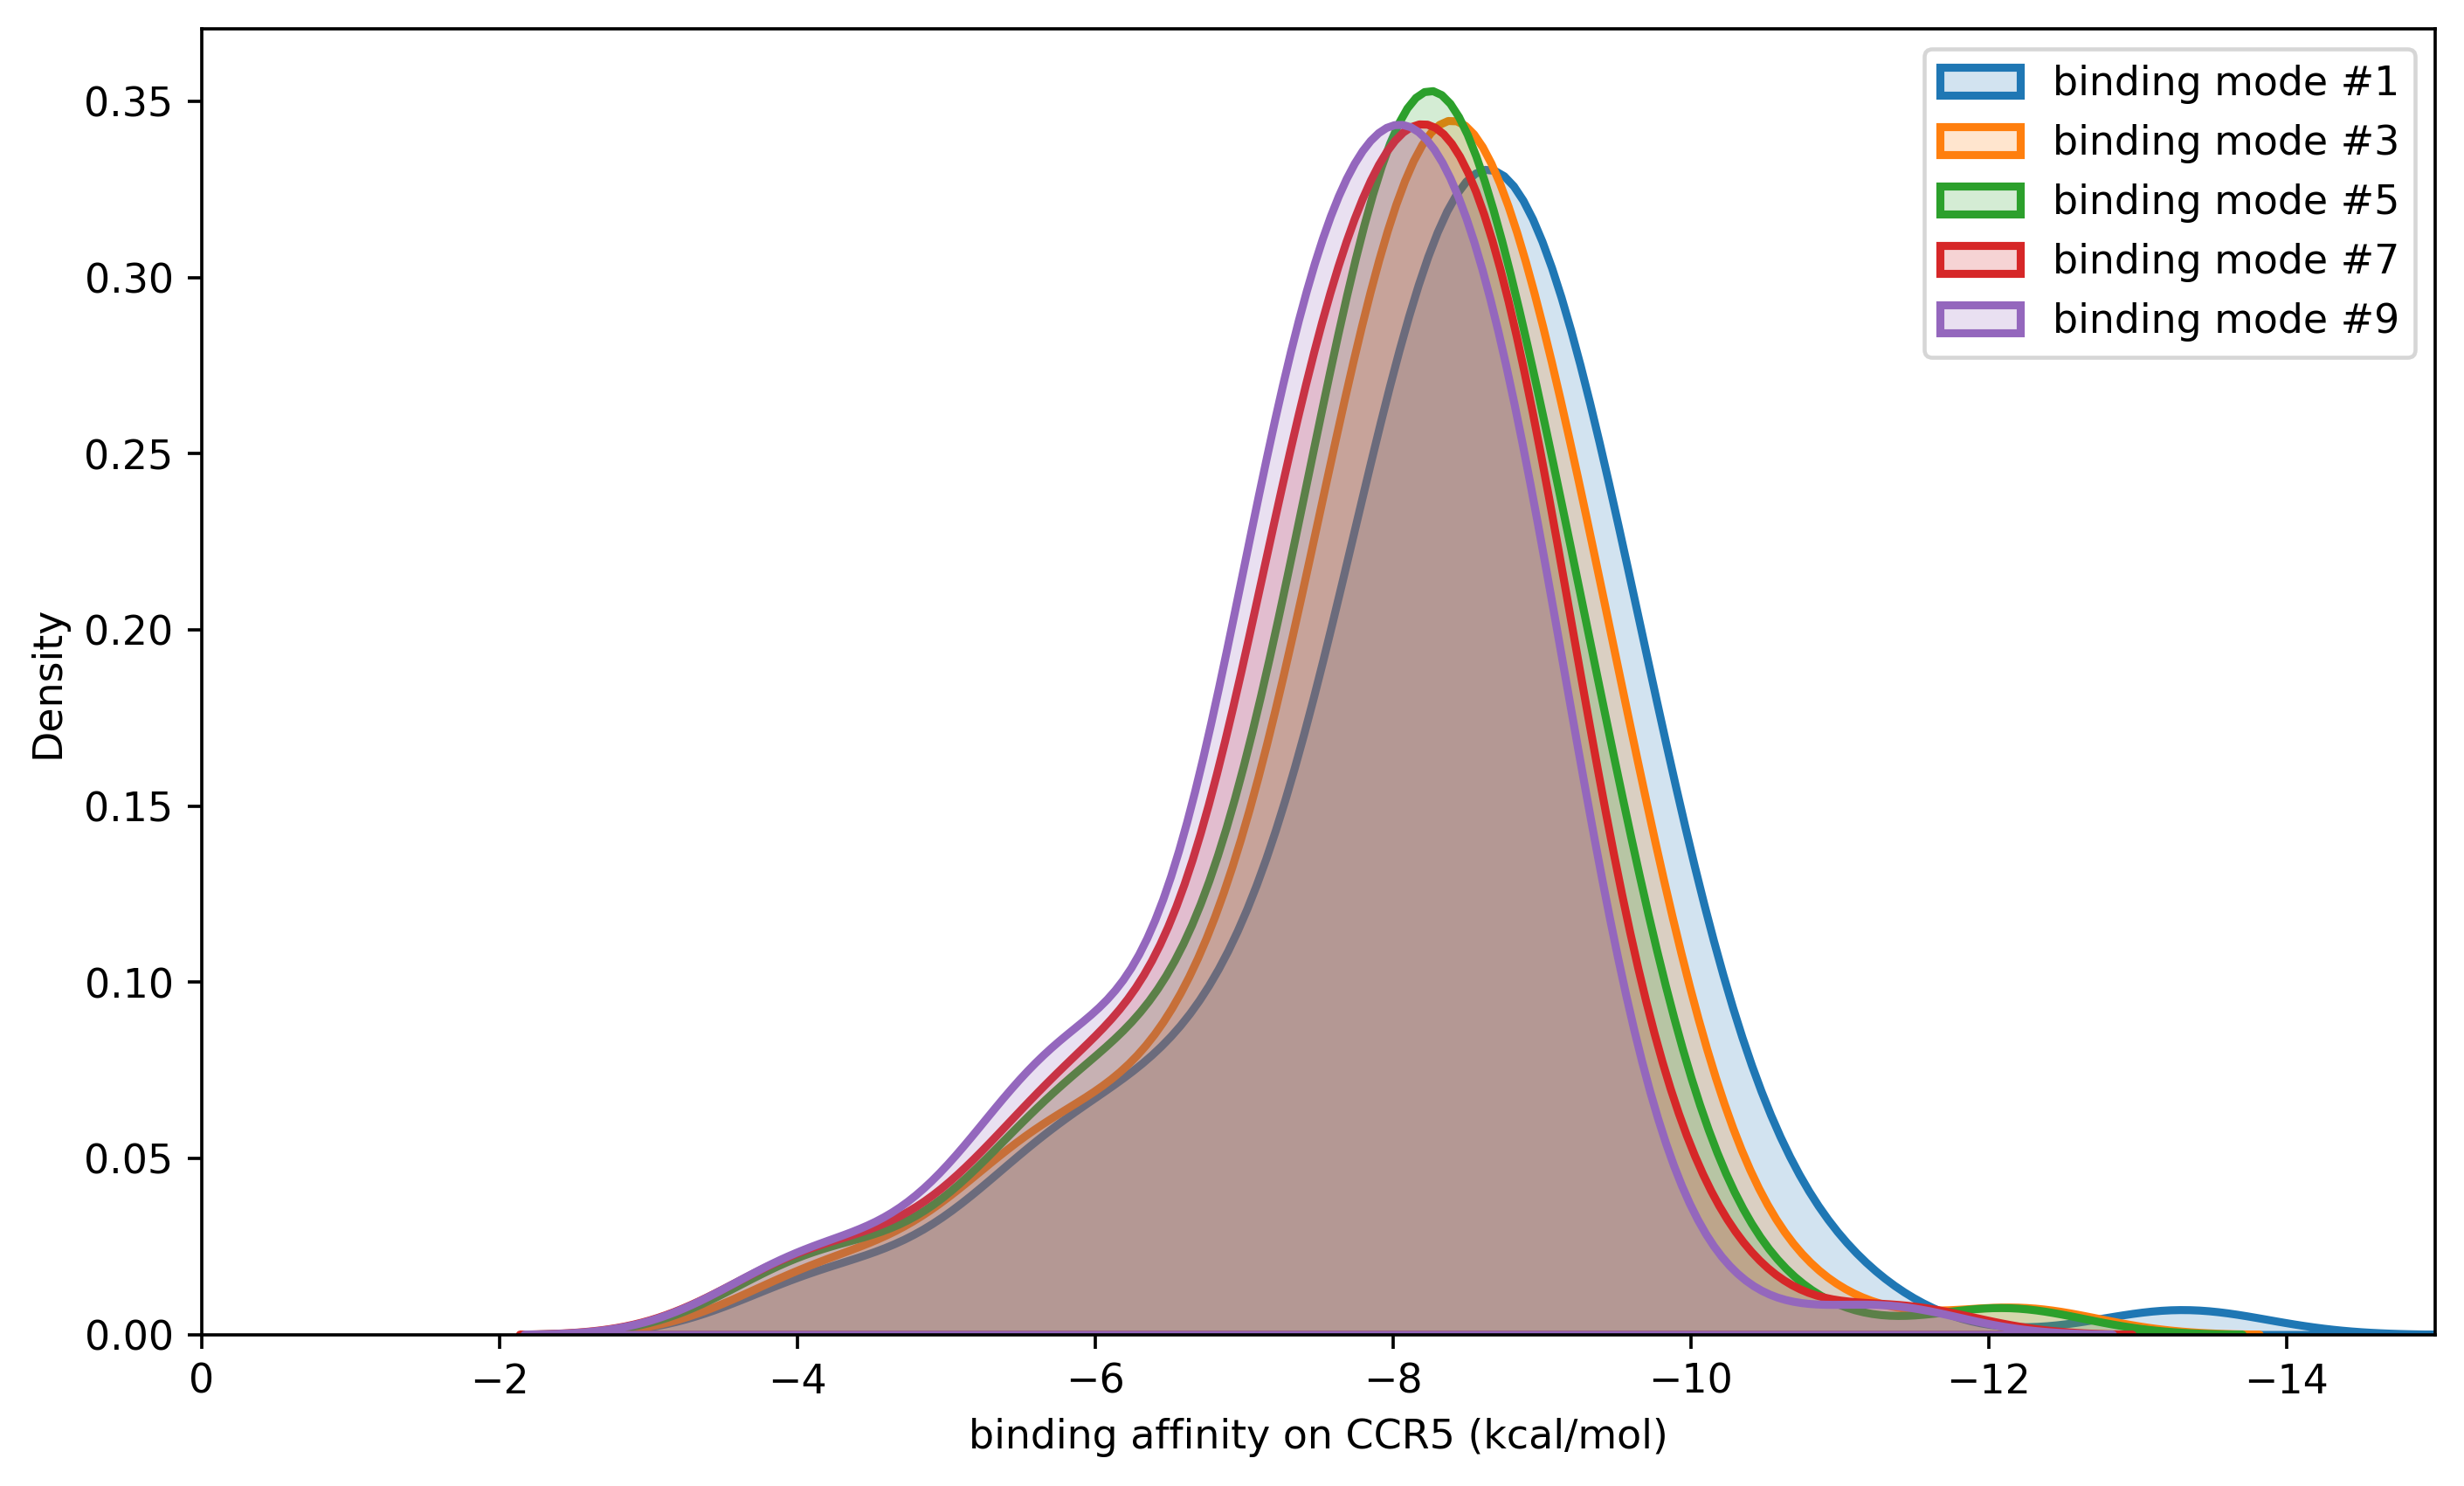

In [265]:
plt.figure(figsize=(10, 6), dpi=330)

sns.kdeplot(data=logs_df["affin_kcal_mol-1_1"], linewidth=2, label="binding mode #1", fill=True, alpha=.2)
sns.kdeplot(data=logs_df["affin_kcal_mol-1_2"], linewidth=2, label="binding mode #3", fill=True, alpha=.2)
sns.kdeplot(data=logs_df["affin_kcal_mol-1_3"], linewidth=2, label="binding mode #5", fill=True, alpha=.2)
sns.kdeplot(data=logs_df["affin_kcal_mol-1_4"], linewidth=2, label="binding mode #7", fill=True, alpha=.2)
sns.kdeplot(data=logs_df["affin_kcal_mol-1_5"], linewidth=2, label="binding mode #9", fill=True, alpha=.2)

plt.xlim(0, -15)
plt.xlabel("binding affinity on CCR5 (kcal/mol)")
plt.legend()
plt.show()

In [227]:
len(logs_df)

99